In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [2]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/drive/MyDrive/Machine Learning/test_set (1)/test_set',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)


Found 1582 files belonging to 2 classes.


In [3]:
#Normalize
def process(image,label):
  image = tf.cast(image/255.,tf.float32)
  return image,label

train_ds = train_ds.map(process)


In [35]:
# Create CNN Module
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [36]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 125, 125, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 60, 60, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 28800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │     3,686,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,717,185 (14.18 MB)

 Trainable params: 3,716,993 (14.18 MB)

 Non-trainable params: 192 (768.00 B)

In [37]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [38]:
history = model.fit(train_ds,epochs=10)

Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 14s 151ms/step - accuracy: 0.6167 - loss: 0.9342
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 14s 100ms/step - accuracy: 0.7053 - loss: 0.6055
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - accuracy: 0.7523 - loss: 0.5076
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 9s 108ms/step - accuracy: 0.8539 - loss: 0.3391
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 127ms/step - accuracy: 0.9072 - loss: 0.2581
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - accuracy: 0.9334 - loss: 0.1575
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 102ms/step - accuracy: 0.9748 - loss: 0.0682
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 113ms/step - accuracy: 0.9735 - loss: 0.0711
Epoch 9/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 108ms/step - accuracy: 0.9820 - loss: 0.0527
Epoch 10/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - accuracy: 0.9770 - loss: 0.0551


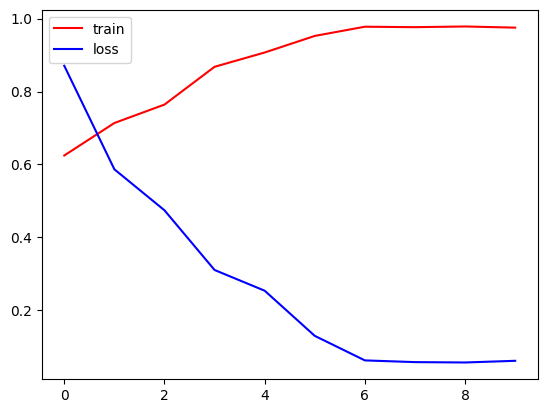

In [39]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['loss'],color='blue',label='loss')
plt.legend()
plt.show()

In [40]:
import cv2

In [61]:
test_img = cv2.imread('/content/Dog2.webp')

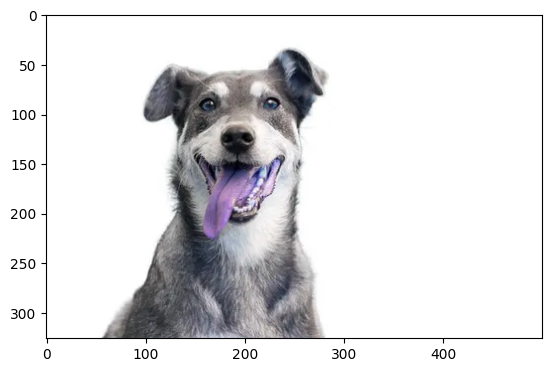

In [62]:
plt.imshow(test_img)

In [63]:
test_img.shape

(326, 500, 3)

In [64]:
test_img = cv2.resize(test_img,(256,256))

In [65]:
test_input = test_img.reshape((1,256,256,3))

In [66]:
model.predict(test_input)
if model.predict(test_input)>0.5:
  print("Dog")
else:
  print("Cat")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Dog
